Hello, the flow of the work for this paper will be as follows:
1. read the data
2. scale the data
3. visualise the data
4. split the data
5. get feature importance (permutation)
6. visualize the best N imported features
7. try from (1, 5, 10, 50) features, where the features are equally spaced
8. the split should be (70, 30)
9. try up to 6 different classification models (RF, XGB, SVM, LR, KNNs, MD)
10. get the error bars and make comparisons

In [16]:
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
from matplotlib.pyplot import show # This displays graphs once they have been created
import numpy as np
import matplotlib.pyplot as plt
from source.roc import draw_roc 


### 1. read the data

In [17]:
df = pd.read_excel('/users/hussein/source/apple_classification/data/Detect-GS.xlsx')

In [18]:
df.shape

(503, 2078)

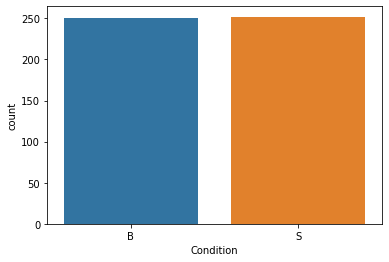

In [19]:
df['Condition'] = df['Condition'].str.upper()
ax = sns.countplot(x="Condition",data=df)


### rename cols

In [20]:
wavenumbers = np.float_(df.columns[4:])
type(wavenumbers[0])
wavelengths = (1/wavenumbers)*10**7

print(str(wavenumbers[0])+", "+ str(wavelengths[0]))
df.columns.values[4:] = np.round(wavelengths, 3)
df.head(4)

11995.49, 833.6466455309454


,Sample,Condition,Age,Source,833.647,833.915,834.183,834.451,834.72,834.989,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607


#### getting x, and y

In [21]:
df_input= df.iloc[:, 4: ]
df_input


,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,-0.113074,-0.113266,-0.114108,-0.114498,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,-0.159698,-0.159639,-0.160184,-0.160504,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,-0.137664,-0.138295,-0.139098,-0.139391,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,-0.142162,-0.142754,-0.143336,-0.143301,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607
4,-0.166998,-0.166739,-0.166921,-0.166882,-0.166638,-0.166418,-0.166405,-0.166787,-0.167322,-0.167319,...,0.520031,0.521815,0.520814,0.518175,0.518827,0.523526,0.529133,0.532134,0.531992,0.529879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-0.005843,-0.005746,-0.005965,-0.006040,-0.005732,-0.005905,-0.006496,-0.006305,-0.005184,-0.004249,...,0.823532,0.825095,0.831351,0.830832,0.824308,0.817157,0.814575,0.815848,0.817096,0.823652
499,-0.010555,-0.009949,-0.010038,-0.010154,-0.010212,-0.010717,-0.010729,-0.009878,-0.009303,-0.009316,...,0.647229,0.642954,0.642807,0.646312,0.650215,0.651266,0.648941,0.648903,0.655380,0.662244
500,-0.054230,-0.054836,-0.055471,-0.055616,-0.055853,-0.056578,-0.056854,-0.055983,-0.054825,-0.054404,...,0.403613,0.404402,0.408775,0.410042,0.406809,0.405787,0.406463,0.405325,0.406469,0.410188
501,0.052804,0.052833,0.053037,0.053045,0.052818,0.052379,0.052130,0.052272,0.052694,0.053489,...,1.357465,1.369164,1.395378,1.412128,1.423115,1.429553,1.404126,1.366339,1.349845,1.325851


In [22]:
cols = df_input.columns


In [23]:
y = df['Condition']
y = y.map({'S': 1, 'B': 0})

### feature selection

In [24]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np
from scipy.signal import argrelextrema


In [25]:
wavelengths_values = df_input.values
wavelengths_values.shape

(503, 2074)

In [26]:
WAVE = (wavelengths_values.mean(0))
print(WAVE.shape)

(2074,)


[  26   76  127  203  459  691  946 1316 1664 1765 2009 2070]


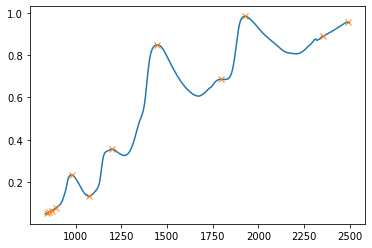

In [37]:
peaks, _ = find_peaks(WAVE, distance=50)
print(peaks)
plt.plot(df_input.columns, WAVE)
plt.plot(df_input.columns[peaks], WAVE[peaks], "x")
# plt.plot(np.zeros_like(WAVE), "--", color="gray")
plt.show()

In [38]:
df_input_selected = df_input.iloc[:, peaks ]
df_input_selected


,840.675,854.529,869.139,891.861,977.986,1071.782,1198.078,1445.173,1792.974,1927.614,2354.805,2492.924
0,-0.110334,-0.103814,-0.095268,-0.077737,0.109653,-0.012597,0.249928,0.753729,0.602477,0.869591,0.794212,0.854541
1,-0.157117,-0.150109,-0.142756,-0.126931,0.035220,-0.072167,0.145988,0.449479,0.363519,0.471524,0.413226,0.420373
2,-0.135183,-0.128806,-0.120398,-0.105182,0.055417,-0.049908,0.184732,0.735933,0.554994,0.846194,0.761459,0.814169
3,-0.139793,-0.133727,-0.126104,-0.110084,0.049614,-0.056383,0.172622,0.634793,0.493294,0.717471,0.643753,0.679534
4,-0.164172,-0.157856,-0.150523,-0.136781,0.005449,-0.089360,0.106631,0.486206,0.367608,0.562257,0.484034,0.529133
...,...,...,...,...,...,...,...,...,...,...,...,...
498,-0.002286,0.001051,0.004462,0.013854,0.160787,0.065194,0.284987,0.798279,0.615289,0.887433,0.789350,0.814575
499,-0.007743,-0.003963,-0.001928,0.007946,0.147393,0.056877,0.251352,0.642796,0.499242,0.699542,0.623186,0.648941
500,-0.052199,-0.048184,-0.045115,-0.037392,0.105918,0.010939,0.201707,0.443312,0.366083,0.446680,0.400689,0.406463
501,0.056653,0.060814,0.063717,0.074236,0.218460,0.126602,0.347769,1.093933,0.788615,1.408942,1.198449,1.404126


In [39]:
cols_selc = df_input_selected.columns
print(cols_selc)

Index([ 840.675,  854.529,  869.139,  891.861,  977.986, 1071.782, 1198.078,
       1445.173, 1792.974, 1927.614, 2354.805, 2492.924],
      dtype='object')


### 4. split the data

In [40]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_selected, y, test_size = 0.3, random_state=3, stratify=y) # train and valid sets

In [41]:
print(Xtrain.shape)
print(Xtest.shape)

(352, 12)
(151, 12)


### Feature Importance

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from random import *
import random
from matplotlib import pyplot

In [43]:
feature_imp_local = []

In [44]:
for i in range (2000): # take the average of 3 permutations, with different sizes and random splits (you can increase the number for it to be more robust)
    print("itr: " + str(i))
    
    RandomStateValid = randrange(50)
    ranodmSplitValid = random.uniform(0.2, 0.5)
    XtrainPer, XvalidPer, YtrainPer, YvalidPer = train_test_split( np.array(Xtrain), np.array(Ytrain), test_size = ranodmSplitValid, random_state=RandomStateValid, stratify=Ytrain) # train and valid sets
    print("Train shape: "+str(XtrainPer.shape))
    print("Valid shape: "+str(XvalidPer.shape))
    print()
   
    # train
    model = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs = -1)
    model.fit(XtrainPer, YtrainPer)
    
    results = permutation_importance(model, XvalidPer, YvalidPer, scoring='precision_macro', n_repeats = 15, n_jobs = -1)
    importance = results.importances_mean
    # print(importance)

    feature_imp_local.append(importance)

itr: 0
Train shape: (262, 12)
Valid shape: (90, 12)

itr: 1
Train shape: (215, 12)
Valid shape: (137, 12)

itr: 2
Train shape: (187, 12)
Valid shape: (165, 12)

itr: 3
Train shape: (242, 12)
Valid shape: (110, 12)

itr: 4
Train shape: (273, 12)
Valid shape: (79, 12)

itr: 5
Train shape: (264, 12)
Valid shape: (88, 12)

itr: 6
Train shape: (206, 12)
Valid shape: (146, 12)

itr: 7
Train shape: (275, 12)
Valid shape: (77, 12)

itr: 8
Train shape: (185, 12)
Valid shape: (167, 12)

itr: 9
Train shape: (263, 12)
Valid shape: (89, 12)

itr: 10
Train shape: (205, 12)
Valid shape: (147, 12)

itr: 11
Train shape: (235, 12)
Valid shape: (117, 12)

itr: 12
Train shape: (184, 12)
Valid shape: (168, 12)

itr: 13
Train shape: (208, 12)
Valid shape: (144, 12)

itr: 14
Train shape: (234, 12)
Valid shape: (118, 12)

itr: 15
Train shape: (272, 12)
Valid shape: (80, 12)

itr: 16
Train shape: (248, 12)
Valid shape: (104, 12)

itr: 17
Train shape: (222, 12)
Valid shape: (130, 12)

itr: 18
Train shape: (273,

In [46]:
print(np.array(feature_imp_local).shape)
arr_imp_local = np.array(feature_imp_local).mean(0)
print(arr_imp_local)

sorted_idx_loc = arr_imp_local.argsort()
print(sorted_idx_loc)
print(cols_selc[sorted_idx_loc])

(2000, 12)
[0.00714762 0.00593841 0.00517931 0.00412713 0.04502183 0.00389987
 0.03377209 0.01523335 0.00359311 0.0264131  0.00891096 0.01043707]
[ 8  5  3  2  1  0 10 11  7  9  6  4]
Index([1792.974, 1071.782,  891.861,  869.139,  854.529,  840.675, 2354.805,
       2492.924, 1445.173, 1927.614, 1198.078,  977.986],
      dtype='object')


In [47]:
%store sorted_idx_loc
%store arr_imp_local

Stored 'sorted_idx_loc' (ndarray)
Stored 'arr_imp_local' (ndarray)


In [48]:
%store -r sorted_idx_loc
%store -r arr_imp_local

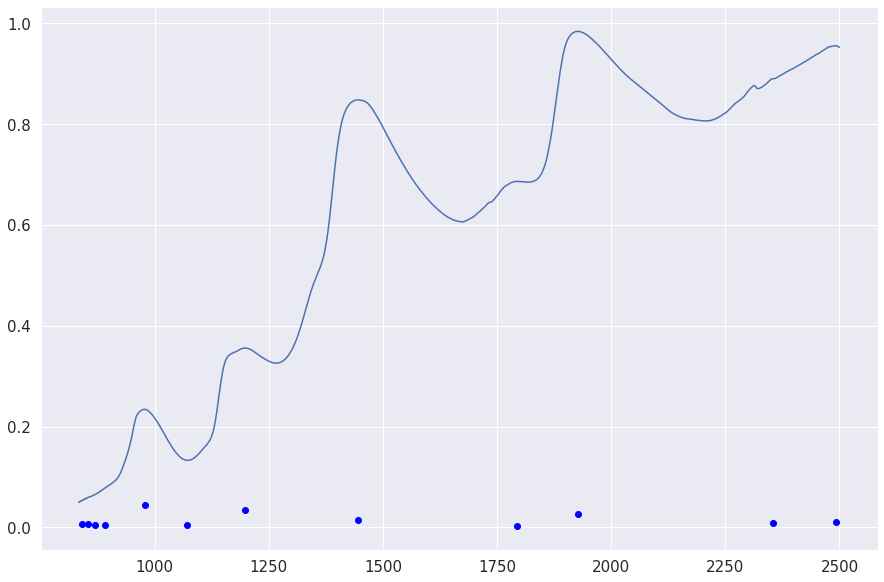

In [55]:

pyplot.rcParams["figure.figsize"] = (15,10)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['ytick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['xtick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['axes.labelsize'] = 15
pyplot.rcParams['axes.titlesize'] = 15


# print(attrNames[sorted_idx][-n:])
# print(arrimp[sorted_idx][-n:])
plt.plot(df_input.columns, WAVE)
# plt.scatter(df_input.columns[peaks], WAVE[peaks], "x")

pyplot.scatter( cols_selc[sorted_idx_loc], arr_imp_local[sorted_idx_loc], color = 'blue')
# pyplot.scatter(attrNames[sorted_idx][:n], arrimp[sorted_idx][:n], color= 'red')

# pyplot.barh(np.arange(0, n), arrimp[sorted_idx][-n:])

# # pyplot.barh(range(10), arrimp[10:])

pyplot.show()
# peaks are important.

In [51]:
df_input_selected['Condition'] = df['Condition'].values


/tmp/ipykernel_919515/1162088153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input_selected['Condition'] = df['Condition'].values


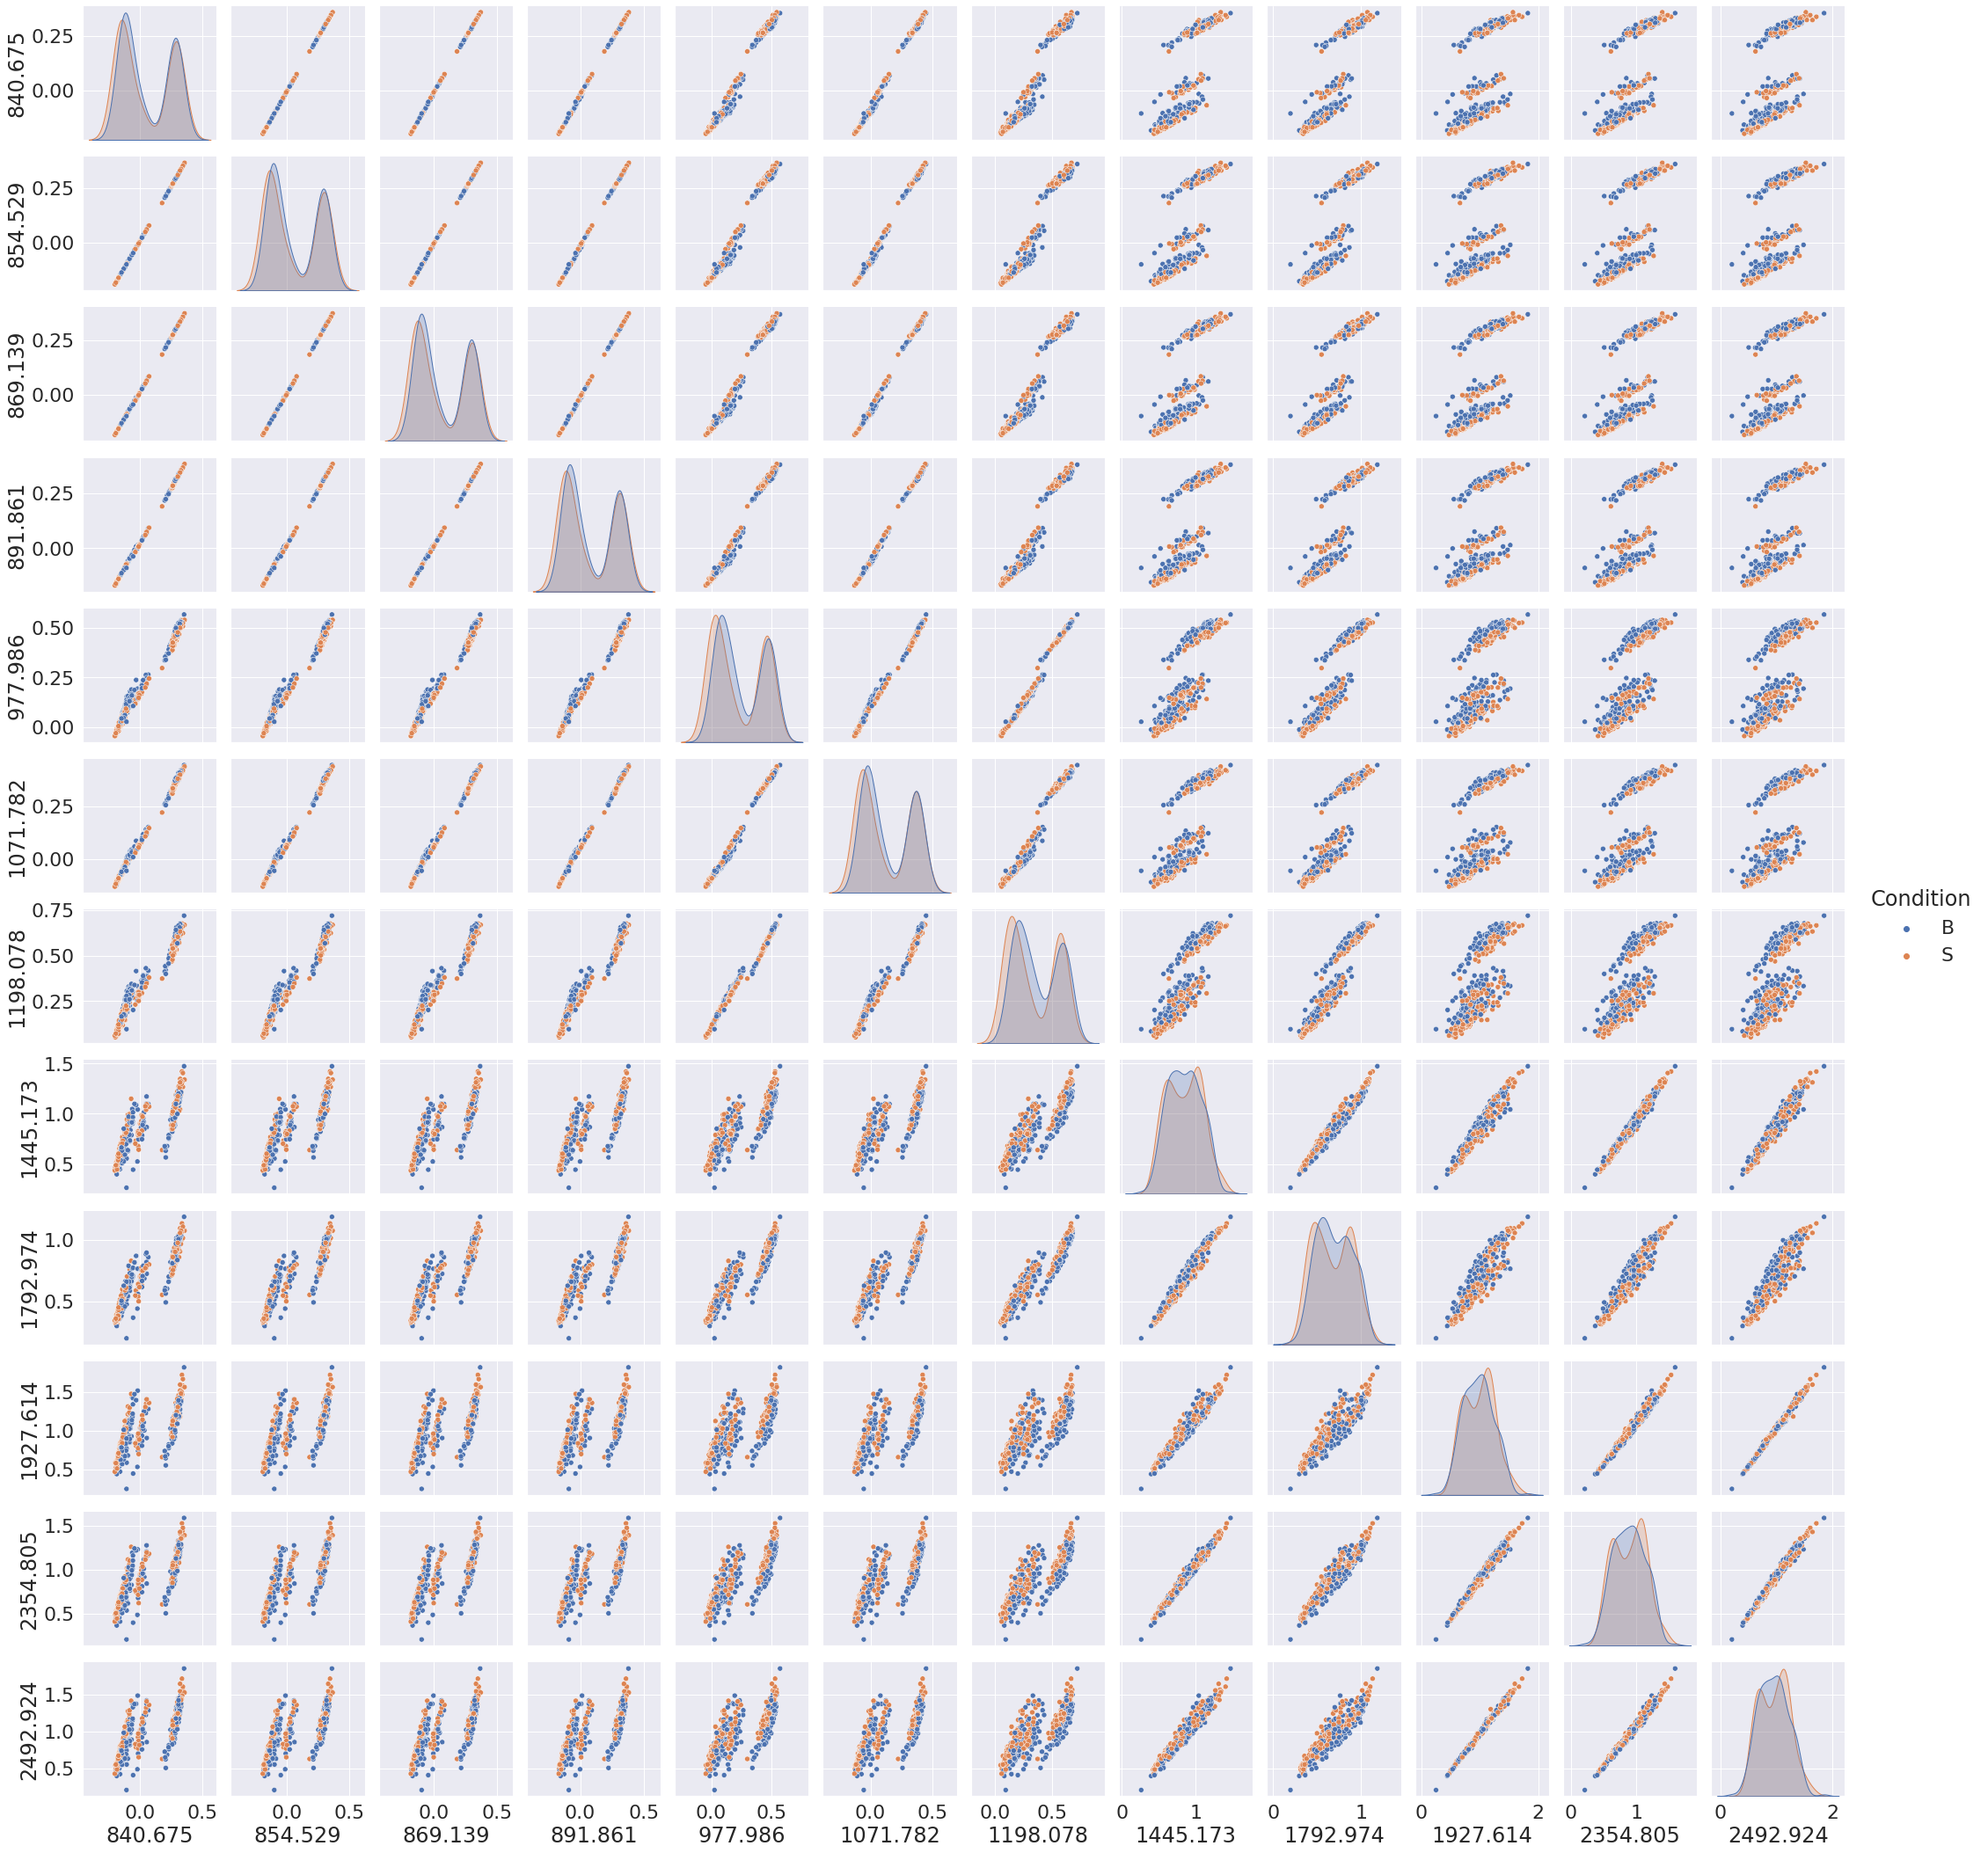

In [53]:
sns.set(font_scale=2)
sns.pairplot(df_input_selected, hue="Condition")

### ML with diffrint features as an input

In [24]:
df_input_selected = df_input_selected.iloc[:, :-1 ]
df_input_selected

,861.915,891.861,977.986,1071.782,1198.078,1445.173,1792.974,1927.614,2492.924
0,-0.100034,-0.077737,0.109653,-0.012597,0.249928,0.753729,0.602477,0.869591,0.854541
1,-0.147101,-0.126931,0.035220,-0.072167,0.145988,0.449479,0.363519,0.471524,0.420373
2,-0.125090,-0.105182,0.055417,-0.049908,0.184732,0.735933,0.554994,0.846194,0.814169
3,-0.130297,-0.110084,0.049614,-0.056383,0.172622,0.634793,0.493294,0.717471,0.679534
4,-0.154712,-0.136781,0.005449,-0.089360,0.106631,0.486206,0.367608,0.562257,0.529133
...,...,...,...,...,...,...,...,...,...
498,0.003150,0.013854,0.160787,0.065194,0.284987,0.798279,0.615289,0.887433,0.814575
499,-0.002484,0.007946,0.147393,0.056877,0.251352,0.642796,0.499242,0.699542,0.648941
500,-0.046501,-0.037392,0.105918,0.010939,0.201707,0.443312,0.366083,0.446680,0.406463
501,0.062789,0.074236,0.218460,0.126602,0.347769,1.093933,0.788615,1.408942,1.404126


In [67]:
features_ind = [ [4, 6], [4, 6, 9, 7], [4, 6, 9, 7, 11 ,10], [4, 6, 9, 7, 11 ,10, 0, 1],
                [4, 6, 9, 7, 11 ,10, 0, 1, 2, 3], [4, 6, 9, 7, 11 ,10, 0, 1, 2, 3, 5, 8]] # define the number features. 
# number_features = [3, 5] # define the number features
# (1000, 9)

#[ 8  5  3  2  1  0 10 11  7  9  6  4]


#### define the hyper parameters

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from numpy import random as np_random

In [69]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr = LogisticRegression()
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

##############################
C_range = np.logspace(-1, 10, 20) # define a set of values for the parameter C
gamma_range = np.logspace(-9, 3, 20) # define a set of values for the parameter gamma

svm = SVC(kernel="rbf")
svm_par = dict(gamma=gamma_range, C=C_range)

#########################

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

#max_features = ['sqrt', 'log2']

rf = RandomForestClassifier(random_state=1)
rf_par = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#######################
# https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost/notebook
xgb_par = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5, 9],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 8]
        }
xgb = XGBClassifier()
##################################
n_neighbors = range(1, 30, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

knns = KNeighborsClassifier()
knns_par = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
################
anns = MLPClassifier(max_iter=3000, random_state=1, activation = 'relu', solver = 'sgd')
anns_par = {
    'hidden_layer_sizes': [(3,3),(5,5),(8,3)],
#     'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001,0.01,0.1, 0.05, 0.005 , 0.005, 0.00005],
#     'learning_rate': ['constant','adaptive'],
}
################


models = [[lr, 'lr', 14], [svm, 'svm', 10], [rf, 'rf', 30], [xgb, 'xgb', 30], [knns, 'knns', 30], [anns, 'anns', 30]]
par = [lr_par, svm_par, rf_par, xgb_par, knns_par, anns_par]

# models = [[lr, 'lr']]
# par = [lr_par]


In [70]:
### splits
# splits = [0.4]

ml_dicts = {}


#### train and test

In [71]:
from source.ml_acc import get_accuracy_ml

In [72]:
for m, par in zip(models, par):
    # for s in splits:
    #     X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= s, random_state=1, stratify = y, shuffle = True)
    key0 = str(m[1])
    ml_dicts[key0] = {}
    for f in features_ind:
        print(m)
        print(f)
        print(cols_selc)
        print(cols_selc[f])
                
        xtr =  Xtrain[cols_selc[f]]
        xte =  Xtest[cols_selc[f]]

        results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model
        key = str(m[1])+","+str(len(f))
        ml_dicts[key0][key] = {}

        ml_dicts[key0][key]['tot_acc'] = results[0]
        ml_dicts[key0][key]['jack_train'] = results[1]
        ml_dicts[key0][key]['jack_test'] = results[2]

[LogisticRegression(), 'lr', 14]
[4, 6]
Index([ 840.675,  854.529,  869.139,  891.861,  977.986, 1071.782, 1198.078,
       1445.173, 1792.974, 1927.614, 2354.805, 2492.924],
      dtype='object')
Index([977.986, 1198.078], dtype='object')
[LogisticRegression(), 'lr', 14]
[4, 6, 9, 7]
Index([ 840.675,  854.529,  869.139,  891.861,  977.986, 1071.782, 1198.078,
       1445.173, 1792.974, 1927.614, 2354.805, 2492.924],
      dtype='object')
Index([977.986, 1198.078, 1927.614, 1445.173], dtype='object')
[LogisticRegression(), 'lr', 14]
[4, 6, 9, 7, 11, 10]
Index([ 840.675,  854.529,  869.139,  891.861,  977.986, 1071.782, 1198.078,
       1445.173, 1792.974, 1927.614, 2354.805, 2492.924],
      dtype='object')
Index([977.986, 1198.078, 1927.614, 1445.173, 2492.924, 2354.805], dtype='object')
[LogisticRegression(), 'lr', 14]
[4, 6, 9, 7, 11, 10, 0, 1]
Index([ 840.675,  854.529,  869.139,  891.861,  977.986, 1071.782, 1198.078,
       1445.173, 1792.974, 1927.614, 2354.805, 2492.924],
     

/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/

[MLPClassifier(max_iter=3000, random_state=1, solver='sgd'), 'anns', 30]
[4, 6, 9, 7, 11, 10]
Index([ 840.675,  854.529,  869.139,  891.861,  977.986, 1071.782, 1198.078,
       1445.173, 1792.974, 1927.614, 2354.805, 2492.924],
      dtype='object')
Index([977.986, 1198.078, 1927.614, 1445.173, 2492.924, 2354.805], dtype='object')
[MLPClassifier(max_iter=3000, random_state=1, solver='sgd'), 'anns', 30]
[4, 6, 9, 7, 11, 10, 0, 1]
Index([ 840.675,  854.529,  869.139,  891.861,  977.986, 1071.782, 1198.078,
       1445.173, 1792.974, 1927.614, 2354.805, 2492.924],
      dtype='object')
Index([977.986, 1198.078, 1927.614, 1445.173, 2492.924, 2354.805, 840.675,
       854.529],
      dtype='object')
[MLPClassifier(max_iter=3000, random_state=1, solver='sgd'), 'anns', 30]
[4, 6, 9, 7, 11, 10, 0, 1, 2, 3]
Index([ 840.675,  854.529,  869.139,  891.861,  977.986, 1071.782, 1198.078,
       1445.173, 1792.974, 1927.614, 2354.805, 2492.924],
      dtype='object')
Index([ 977.986, 1198.078, 1927.

/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/

In [81]:
# ml_dicts_CT_local = ml_dicts
# %store ml_dicts_CT_local


Stored 'ml_dicts_CT_local' (dict)


In [82]:
%store -r ml_dicts_CT_local
ml_dicts = ml_dicts_CT_local  

### SD with acc

In [83]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file


In [84]:
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 

    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])    

In [85]:
print(arr_all)

[[['lr,2', 'lr,4', 'lr,6', 'lr,8', 'lr,10', 'lr,12'], [0.5529411764705883, 0.7303370786516854, 0.7386363636363636, 0.75, 0.7471264367816092, 0.7471264367816092], [0.04322377499455565, 0.036290972832301344, 0.043955211264986964, 0.03695548362230112, 0.03998779011350219, 0.0532793839522026]], [['svm,2', 'svm,4', 'svm,6', 'svm,8', 'svm,10', 'svm,12'], [0.5652173913043478, 0.7333333333333333, 0.7362637362637363, 0.71875, 0.7613636363636364, 0.7471264367816092], [0.10188548698967352, 0.123821514067192, 0.14274416123132966, 0.1335438784513806, 0.07911483766360813, 0.13605790628060618]], [['rf,2', 'rf,4', 'rf,6', 'rf,8', 'rf,10', 'rf,12'], [0.5783132530120482, 0.7307692307692307, 0.7037037037037037, 0.7341772151898734, 0.7045454545454546, 0.75], [0.12360816952242544, 0.15674863204247422, 0.14423069266668784, 0.11241546914585823, 0.10595855262575161, 0.08294400482601662]], [['xgb,2', 'xgb,4', 'xgb,6', 'xgb,8', 'xgb,10', 'xgb,12'], [0.5925925925925926, 0.717948717948718, 0.691358024691358, 0.74

[['lr,2', 'lr,4', 'lr,6', 'lr,8', 'lr,10', 'lr,12'], [0.5529411764705883, 0.7303370786516854, 0.7386363636363636, 0.75, 0.7471264367816092, 0.7471264367816092], [0.04322377499455565, 0.036290972832301344, 0.043955211264986964, 0.03695548362230112, 0.03998779011350219, 0.0532793839522026]]
[0.  0.6 1.2 1.8 2.4 3. ]
[['svm,2', 'svm,4', 'svm,6', 'svm,8', 'svm,10', 'svm,12'], [0.5652173913043478, 0.7333333333333333, 0.7362637362637363, 0.71875, 0.7613636363636364, 0.7471264367816092], [0.10188548698967352, 0.123821514067192, 0.14274416123132966, 0.1335438784513806, 0.07911483766360813, 0.13605790628060618]]
[5.  5.6 6.2 6.8 7.4 8. ]
[['rf,2', 'rf,4', 'rf,6', 'rf,8', 'rf,10', 'rf,12'], [0.5783132530120482, 0.7307692307692307, 0.7037037037037037, 0.7341772151898734, 0.7045454545454546, 0.75], [0.12360816952242544, 0.15674863204247422, 0.14423069266668784, 0.11241546914585823, 0.10595855262575161, 0.08294400482601662]]
[10.  10.6 11.2 11.8 12.4 13. ]
[['xgb,2', 'xgb,4', 'xgb,6', 'xgb,8', 'xgb

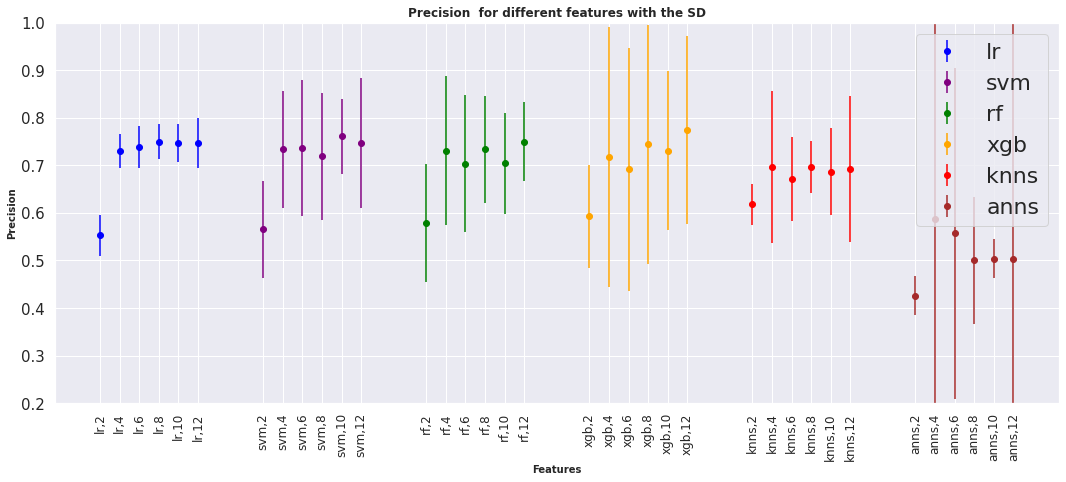

In [86]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(18, 7))
plt.title( "Precision  for different features with the SD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =10)
plt.ylabel("Precision", fontweight ='bold', fontsize =10)

count = 0
n = 5
space = []
tickFeat = []

for result, model, color in zip(arr_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,6)
    print(result)
    print(a)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1

plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(.2, 1)
plt.legend()

plt.show()

In [ ]:
print(1)

### relative performance 

In [ ]:
arr_diff_all = []

for m, m_key in zip (models, ml_dicts.keys()):
    acc_diff_arr = [] 
    sd_diff_arr = [] 
    if m_key != "lr":
        for f_key in ml_dicts[m_key].keys():
            value = f_key.split(',')
            acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ] - ml_dicts['lr']['lr,'+value[1]][ 'tot_acc' ]  )

            sd_train = jack_SD( ml_dicts['lr']['lr,'+value[1]][ 'jack_train' ], ml_dicts[m_key][f_key]['jack_train'] )[0]
            sd_test = jack_SD(  ml_dicts['lr']['lr,'+value[1]][ 'jack_test' ],  ml_dicts[m_key][f_key]['jack_test']   )[0]
            
            sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
            sd_diff_arr.append(sd) # append sd_arr to an array
        arr_diff_all.append([ list(ml_dicts[m_key].keys()), acc_diff_arr, sd_diff_arr])  

In [21]:
# we need to fix the feature key, and delete the model

In [22]:
print(arr_diff_all)

[[['svm,4', 'svm,6', 'svm,11', 'svm,21', 'svm,51'], [0.07272727272727275, 0.03420247867374859, 0.013941102756892199, -0.005689900426742556, -0.0017241379310344307], [0.20345510008042483, 0.33764387459143097, 0.031044082275696553, 0.12725928613057058, 0.04112758707129448]], [['rf,4', 'rf,6', 'rf,11', 'rf,21', 'rf,51'], [0.06545454545454543, -0.02446018893387314, -0.05792947715824215, -0.062200956937799035, -0.07356879812520922], [0.13394921206535546, 0.1219016315441239, 0.10855485306499471, 0.10007293726922052, 0.10984383216512889]], [['xgb,4', 'xgb,6', 'xgb,11', 'xgb,21', 'xgb,51'], [0.06390114739629305, -0.04467945564846698, -0.0664160401002506, -0.06050172159370393, -0.08474300585556283], [0.2373408974183106, 0.12362397664207293, 0.17800179285504208, 0.14946353153503136, 0.14414697596420212]], [['knns,4', 'knns,6', 'knns,11', 'knns,21', 'knns,51'], [0.04842484248424839, -0.04561403508771933, -0.07481940144478838, -0.07046541974771636, -0.07903506230078239], [0.10080244058823391, 0.06

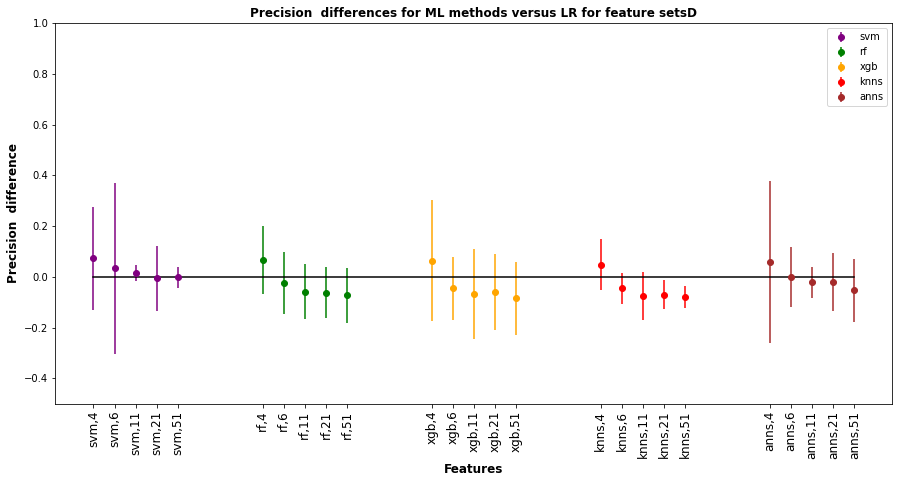

In [38]:
colors = ['purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  differences for ML methods versus LR for feature setsD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision  difference", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1
space = []
tickFeat = []

for result, model, color in zip(arr_diff_all, models[1:], colors):
    a = np.linspace(n*count, n*(1+count)-2,5)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1
    
plt.plot(np.array(space), np.zeros(5*5), color = 'Black')        
plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(-.5, 1)
plt.legend()

plt.show()

In [74]:
print(1)

1
